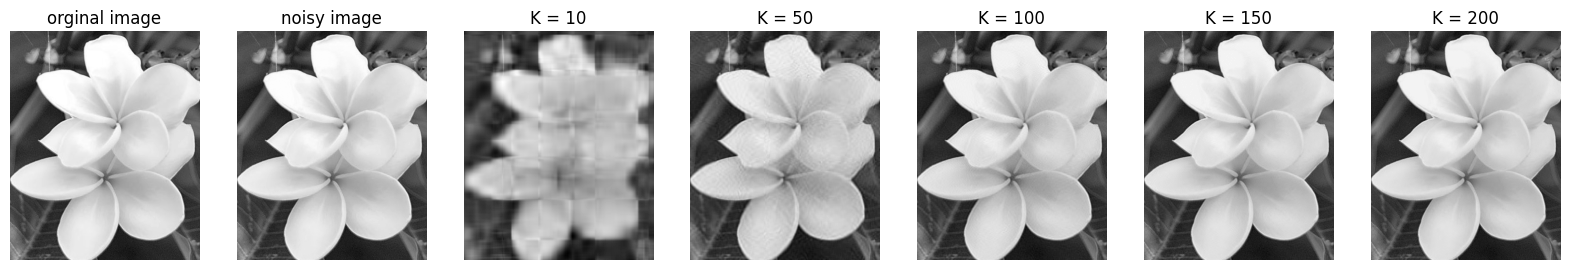

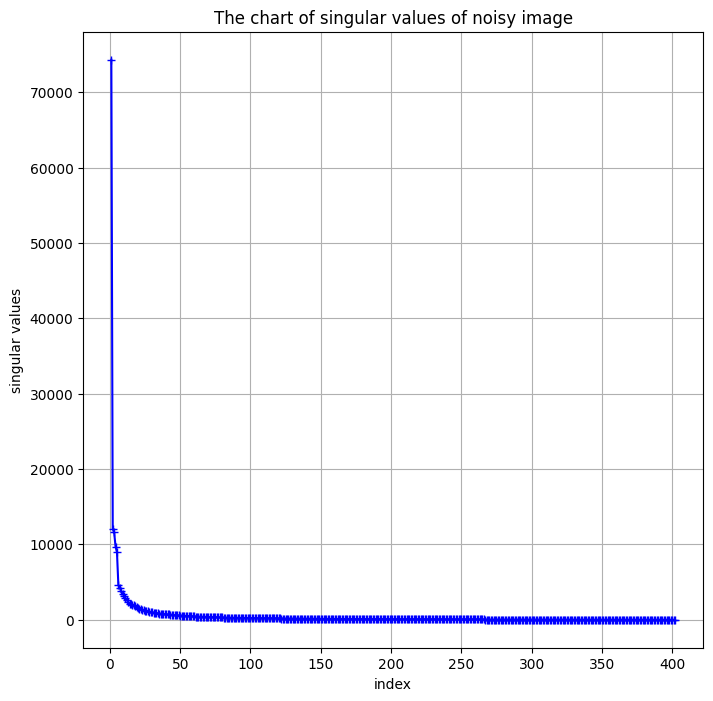

optimal value k: 383


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd

image_path = "flower.jpg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

noise_variance = 0.5
noisy_image = image + np.sqrt(noise_variance) * np.random.normal(0, 1, image.shape)

U, SG, Vt = svd(noisy_image)

K_approximation = [10, 50, 100, 150 , 200]
compressed_images = []
for K in K_approximation:
    compress_image = np.dot(U[:, :K], np.dot(np.diag(SG[:K]), Vt[:K, :]))
    compressed_images.append(compress_image)

plt.figure(figsize=(20, 15))
plt.subplot(1, len(K_approximation) + 2, 1)
plt.imshow(image, cmap='gray')
plt.title("orginal image")
plt.axis('off')

plt.subplot(1, len(K_approximation) + 2, 2)
plt.imshow(noisy_image, cmap='gray')
plt.title("noisy image")
plt.axis('off')

for i, (K, compressed_image) in enumerate(zip(K_approximation, compressed_images), 3):
    plt.subplot(1, len(K_approximation) + 2, i)
    plt.imshow(compressed_image, cmap='gray')
    plt.title(f'K = {K}')
    plt.axis('off')
plt.show()

plt.figure(figsize=(8, 8))
plt.plot(range(1, len(SG) + 1), SG, marker='+', linestyle='-', color='blue')
plt.xlabel("index")
plt.ylabel("singular values")
plt.title("The chart of singular values of noisy image")
plt.grid(True)
plt.show()

optimal_K = np.argmax(np.gradient(SG)) + 1
print(f'optimal value k: {optimal_K}')